# Исследование рынка общественного питания Москвы

**ОПИСАНИЕ ПРОЕКТА**

**Необходимо провести исследования рынка перед запуском проекта открытия кафе, где обслуживание будет роботизировано. Какой формат? Сетевой или не сетевой? Локации? Число посадочных мест?**

**ОПИСАНИЕ ДАННЫХ**

**Таблица rest_data:**

<br>**id** — ***идентификатор объекта;***
<br>**object_name** — ***название объекта общественного питания;***
<br>**chain** — ***сетевой ресторан;***
<br>**object_type** — ***тип объекта общественного питания;***
<br>**address** — ***адрес;***
<br>**number** — ***количество посадочных мест.***

<h1>Оглавление<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-и-обработка-данных" data-toc-modified-id="Загрузка-и-обработка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка и обработка данных</a></span><ul class="toc-item"><li><span><a href="#Загрузка-и-оценка-датасета" data-toc-modified-id="Загрузка-и-оценка-датасета-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Загрузка и оценка датасета</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Предобработка данных</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Cоотношение-видов-объектов-общественного-питания-по-количеству" data-toc-modified-id="Cоотношение-видов-объектов-общественного-питания-по-количеству-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Cоотношение видов объектов общественного питания по количеству</a></span></li><li><span><a href="#Cоотношение-сетевых-и-несетевых-заведений-по-количеству" data-toc-modified-id="Cоотношение-сетевых-и-несетевых-заведений-по-количеству-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Cоотношение сетевых и несетевых заведений по количеству</a></span></li><li><span><a href="#Соотношение-типов-сетевых-заведений" data-toc-modified-id="Соотношение-типов-сетевых-заведений-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Соотношение типов сетевых заведений</a></span></li><li><span><a href="#Распределение-посадочных-мест-в-сетевых-заведениях" data-toc-modified-id="Распределение-посадочных-мест-в-сетевых-заведениях-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Распределение посадочных мест в сетевых заведениях</a></span></li><li><span><a href="#Среднее-количество-посадочных-мест" data-toc-modified-id="Среднее-количество-посадочных-мест-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Среднее количество посадочных мест</a></span></li><li><span><a href="#Выделение-улиц-в-отдельный-столбец" data-toc-modified-id="Выделение-улиц-в-отдельный-столбец-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Выделение улиц в отдельный столбец</a></span></li><li><span><a href="#Топ-10-улиц-с-самым-большим-количеством-заведений-общепита" data-toc-modified-id="Топ-10-улиц-с-самым-большим-количеством-заведений-общепита-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>Топ 10 улиц с самым большим количеством заведений общепита</a></span></li><li><span><a href="#Число-улиц-с-одним-объектом-общественного-питания" data-toc-modified-id="Число-улиц-с-одним-объектом-общественного-питания-2.8"><span class="toc-item-num">2.8&nbsp;&nbsp;</span>Число улиц с одним объектом общественного питания</a></span></li><li><span><a href="#Интерактивная-карта-распределения-заведений-общепита-Москвы" data-toc-modified-id="Интерактивная-карта-распределения-заведений-общепита-Москвы-2.9"><span class="toc-item-num">2.9&nbsp;&nbsp;</span>Интерактивная карта распределения заведений общепита Москвы</a></span></li><li><span><a href="#Распределение-количества-посадочных-мест-для-улиц-с-большим-количеством-объектов-общественного-питания" data-toc-modified-id="Распределение-количества-посадочных-мест-для-улиц-с-большим-количеством-объектов-общественного-питания-2.10"><span class="toc-item-num">2.10&nbsp;&nbsp;</span>Распределение количества посадочных мест для улиц с большим количеством объектов общественного питания</a></span></li></ul></li><li><span><a href="#Итоговый-вывод" data-toc-modified-id="Итоговый-вывод-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Итоговый вывод</a></span></li></ul></div>

## Загрузка и обработка данных

### Загрузка и оценка датасета

In [68]:
# Установка folium

!pip install folium

Defaulting to user installation because normal site-packages is not writeable


In [69]:
# Установка geopandas
!pip install geopandas

Defaulting to user installation because normal site-packages is not writeable


In [70]:
# Импорт необходимых библиотек
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import numpy as np
import io
from unicodedata import normalize
import folium  
from folium.plugins import Search  
from folium.plugins import HeatMap, Fullscreen
from shapely.geometry import Point
from IPython.display import IFrame, HTML
import geopandas 

sns.set_style('darkgrid')
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_columns', 100)
pd.options.display.max_rows = 100
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
cm = sns.light_palette("brown", as_cmap=True)

In [71]:
# Чтение файла
df = pd.read_csv('rest_data.csv')
df_original = df.copy()

In [72]:
# Функция просмотра датасетов
def datalook(dataset):
    display(dataset.info())
    display(dataset.head())
    display(dataset.describe())
    display(dataset.describe(include=[object]))
    print('Количество полных дубликатов:', dataset.duplicated().sum())
    return

In [73]:
# Оценка таблицы с данными
datalook(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
id             15366 non-null int64
object_name    15366 non-null object
chain          15366 non-null object
object_type    15366 non-null object
address        15366 non-null object
number         15366 non-null int64
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


None

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


,id,number
count,15366.00,15366.00
mean,119720.07,59.55
std,73036.13,74.74
min,838.00,0.00
25%,28524.00,12.00
50%,144974.50,40.00
75%,184262.25,80.00
max,223439.00,1700.00


,object_name,chain,object_type,address
count,15366,15366,15366,15366
unique,10393,2,9,9108
top,Столовая,нет,кафе,"город Москва, Ходынский бульвар, дом 4"
freq,267,12398,6099,95


Количество полных дубликатов: 0


**Пропусков данных нет, тип данных соответствует логике столбца, тип объекта можно привести к типу category, строчные данные - в нижний регистр**

### Предобработка данных

In [74]:
# Оценк уникальных значений типа объекта
df['object_type'].unique().tolist()

['кафе',
 'столовая',
 'закусочная',
 'предприятие быстрого обслуживания',
 'ресторан',
 'кафетерий',
 'буфет',
 'бар',
 'магазин (отдел кулинарии)']

In [75]:
df['object_type'].unique()

array(['кафе', 'столовая', 'закусочная',
       'предприятие быстрого обслуживания', 'ресторан', 'кафетерий',
       'буфет', 'бар', 'магазин (отдел кулинарии)'], dtype=object)

In [76]:
# Приведение cтолбца с наименованием к нижнему регмстру
df['object_name'] = df['object_name'].str.lower()

df.head()

,id,object_name,chain,object_type,address,number
0,151635,сметана,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,кафе «академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,пиццетория,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,кафе «вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


In [77]:
# Приведение столбца содержащего тип объекта к типу category
df['object_type'] = df['object_type'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
id             15366 non-null int64
object_name    15366 non-null object
chain          15366 non-null object
object_type    15366 non-null category
address        15366 non-null object
number         15366 non-null int64
dtypes: category(1), int64(2), object(3)
memory usage: 615.7+ KB


In [78]:
# Флаг принадлежности к сети заменен на значения, сетевое, несетевое
df.loc[df['chain' ]== 'да', 'chain'] = 'сетевое'
df.loc[df['chain' ]== 'нет', 'chain'] = 'несетевое'

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
id             15366 non-null int64
object_name    15366 non-null object
chain          15366 non-null object
object_type    15366 non-null category
address        15366 non-null object
number         15366 non-null int64
dtypes: category(1), int64(2), object(3)
memory usage: 615.7+ KB


In [80]:
# Проверка дубликатов по названию, типу, адресу и количеству мест
duplicated = df[df.duplicated(subset=['object_name', 'object_type', 'address', 'number'])].reset_index(drop=True)
duplicated

,id,object_name,chain,object_type,address,number
0,28611,комбинат питания мгту им.н.э.баумана,несетевое,столовая,"город Москва, 2-я Бауманская улица, дом 5, стр...",100
1,71896,буфет «коникс-школьник»,несетевое,буфет,"город Москва, улица Удальцова, дом 21",100
2,20914,буфет мади,несетевое,буфет,"город Москва, Ленинградский проспект, дом 64",40
3,23759,столовая гбоу города москвы № 384,несетевое,буфет,"город Москва, Беловежская улица, дом 67",100
4,23391,столовая «комбинат питания космос»,несетевое,столовая,"город Москва, Новозаводская улица, дом 12/11",15
5,20021,lift,несетевое,кафе,"город Москва, Багратионовский проезд, дом 7, к...",20
6,20025,lift,несетевое,кафе,"город Москва, Багратионовский проезд, дом 7, к...",10
7,145227,кафе при азс,несетевое,кафе,"город Москва, Огородный проезд, дом 7, строение 1",0
8,107442,кафе,несетевое,кафе,"город Москва, 1-я Останкинская улица, дом 55",20
9,107574,кафе,несетевое,кафе,"город Москва, 1-я Останкинская улица, дом 55",10


**Подавляющее большинство из 85 заведений в таблице выше - не сетевые с недетализованными названиями, которые возможно обобщающие, даже если находятся по одному адресу, трудно однозначно опеределить такие заведения как дубли. Число таких заведений в общей массе данных около 0.5% большого влияния на результаты они вряд ли окажут. Данные оставлены без изменения.**

In [81]:
# Список крупных форматов
big_types = ['столовая', 'ресторан']

In [82]:
# Проверка крупных форматов с нулевой посадкой
df.query('number == 0 and object_type in @big_types').reset_index()

,index,id,object_name,chain,object_type,address,number
0,206,150836,гбоу школа №1468,несетевое,столовая,"город Москва, Волгоградский проспект, дом 17, ...",0
1,1873,79718,макдоналдс,сетевое,ресторан,"город Москва, поселение Московский, деревня Го...",0
2,2101,29844,вкусный выбор,несетевое,столовая,"город Москва, аллея Жемчуговой, дом 1А",0
3,2130,152335,пищеблок ( закрытое),несетевое,столовая,"город Москва, Ленинский проспект, дом 8, корпу...",0
4,2675,23137,самса хаус,несетевое,столовая,"город Москва, Широкая улица, дом 12",0
5,4176,150827,гбоу школа №498,несетевое,столовая,"город Москва, улица Малые Каменщики, дом 18",0
6,4490,152298,фудмаркет. яшечкина,несетевое,ресторан,"город Москва, улица Новый Арбат, дом 21",0
7,4491,152299,фудмаркет. грачева,несетевое,ресторан,"город Москва, улица Новый Арбат, дом 21",0
8,4492,152305,фудмаркет. шапиро,несетевое,ресторан,"город Москва, улица Новый Арбат, дом 21",0
9,4493,152307,фудмаркет. салпагарова,несетевое,ресторан,"город Москва, улица Новый Арбат, дом 21",0


**64 заведения с типом ресторан или столовая имеют 0 посадочных мест, если судить по списку таких заведений то многие из них вероятно находяится на фудкортах, где выделенной посадки нет. Тип ресторан обобщающий, без разбивки на подтипы. Есть несколько столовых в школах где возможно не указаны посадочные места. Процент всех таких заведений в общей массы данных минимален, поэтому данные оставлены без изменений.**

**Данные проверены на пропуски, столбец с типом объекта приведен к типу category, все строки - к нижнему регистру. Полных дубликатов и дубликатов по id нет, данные не корректировались**

## Анализ данных

### Cоотношение видов объектов общественного питания по количеству

In [83]:
df_original = df.copy()

In [84]:
# Группировка количества заведений по типу
df_typed = df.groupby(
    'object_type')['id'].agg(type_qty='nunique').sort_values('type_qty', ascending=False).reset_index()
df_typed['type_share'] = round(((df_typed['type_qty'] / (df_typed['type_qty'].sum()))*100),2)
df_typed.style.background_gradient(cmap=cm)

,object_type,type_qty,type_share
0,кафе,6099,39.69
1,столовая,2587,16.84
2,ресторан,2285,14.87
3,предприятие быстрого обслуживания,1923,12.51
4,бар,856,5.57
5,буфет,585,3.81
6,кафетерий,398,2.59
7,закусочная,360,2.34
8,магазин (отдел кулинарии),273,1.78


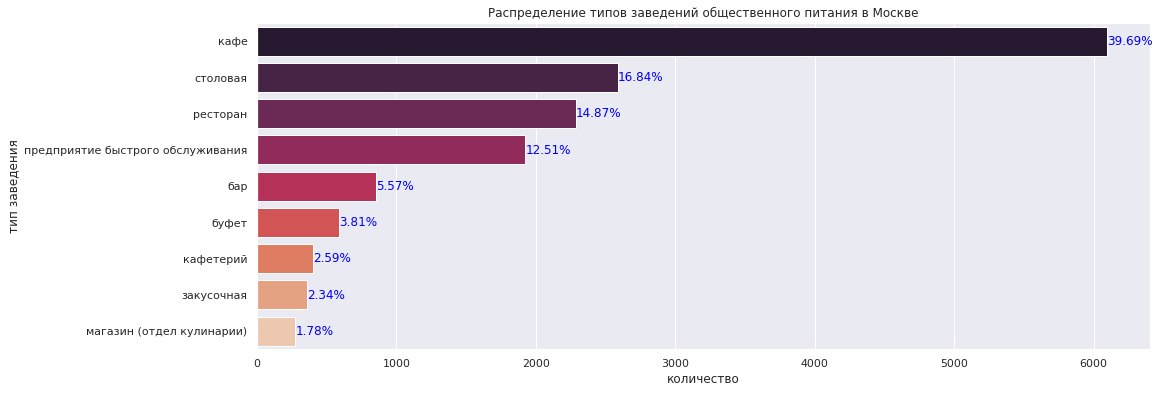

In [85]:
# График распределения видов заведений
fig, ax = plt.subplots(figsize=(16, 6))
ax = sns.barplot(y='object_type', x='type_qty', data=df_typed, orient='h', order=df_typed['object_type'],  palette='rocket')
# Добавление процентных долей
for p in ax.patches:
    width = p.get_width()
    ax.text(width + 1,
            p.get_y() + p.get_height() / 2,
            '{:1.2f}%'.format((width / df_typed['type_qty'].sum())*100),
            ha = 'left',
            va = 'center', color='blue')
plt.title('Распределение типов заведений общественного питания в Москве')
plt.xlabel('количество')
plt.ylabel('тип заведения')
plt.show()

**Более трети заведений общепита в Москве - кафе, остальные популярные форматы: столовые, рестораны, бистро и бары - еще половина рынка. Кафе по распространенности формата более чем втрое опережает столовые или рестораны.**

### Cоотношение сетевых и несетевых заведений по количеству

In [86]:
# Группировка заведений по принадлежности к сетевому формату
df_chain = df.groupby(
    'chain')['id'].agg(type_qty='nunique').sort_values('type_qty', ascending=False).reset_index()
df_chain['type_share'] = round(((df_chain['type_qty'] / (df_chain['type_qty'].sum()))*100),2)
df_chain.style.background_gradient(cmap=cm)

,chain,type_qty,type_share
0,несетевое,12398,80.68
1,сетевое,2968,19.32


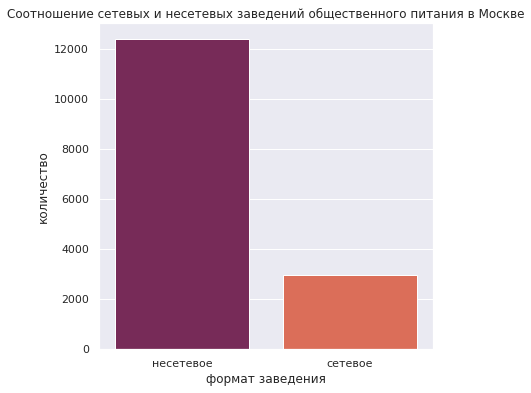

In [87]:
# График распределения видов заведений
fig, ax = plt.subplots(figsize=(6, 6))
sns.barplot(x='chain', y='type_qty', data=df_chain,  palette='rocket')
plt.title('Соотношение сетевых и несетевых заведений общественного питания в Москве')
plt.xlabel('формат заведения')
plt.ylabel('количество')
plt.show()

**Только каждое пятое заведение общепита в Москве - сетевое, в целом рынок не консолидирован, на нем много маленьких самостоятельных игроков - отдельных точек.**

### Соотношение типов сетевых заведений

In [88]:
# Группировка количества сетевых заведений по типу
grouped_chain = df.query(
    'chain == "сетевое"').groupby(
    'object_type')['id'].agg(chain_qty='nunique').reset_index()

In [89]:
#Группировка несентевых заведений по типу
grouped_nonchain = df.query(
    'chain == "несетевое"').groupby(
    'object_type')['id'].agg(non_chain_qty='nunique').reset_index()

In [90]:
# Создание объединенной таблицы с долями по типам и сетевому признаку
formats = pd.merge(grouped_chain, grouped_nonchain, on='object_type')
formats['total_qty'] = formats['chain_qty'] + formats['non_chain_qty']
formats['chain_share'] = round(((formats['chain_qty'] / formats['total_qty'])*100),2)
formats['non_chain_share'] = round(((formats['non_chain_qty'] / formats['total_qty'])*100),2)
formats.style.background_gradient(cmap=cm, subset=['chain_share']).background_gradient(cmap=cm, subset=['non_chain_share'])

,object_type,chain_qty,non_chain_qty,total_qty,chain_share,non_chain_share
0,бар,37,819,856,4.32,95.68
1,буфет,11,574,585,1.88,98.12
2,закусочная,56,304,360,15.56,84.44
3,кафе,1396,4703,6099,22.89,77.11
4,кафетерий,52,346,398,13.07,86.93
5,магазин (отдел кулинарии),78,195,273,28.57,71.43
6,предприятие быстрого обслуживания,791,1132,1923,41.13,58.87
7,ресторан,544,1741,2285,23.81,76.19
8,столовая,3,2584,2587,0.12,99.88


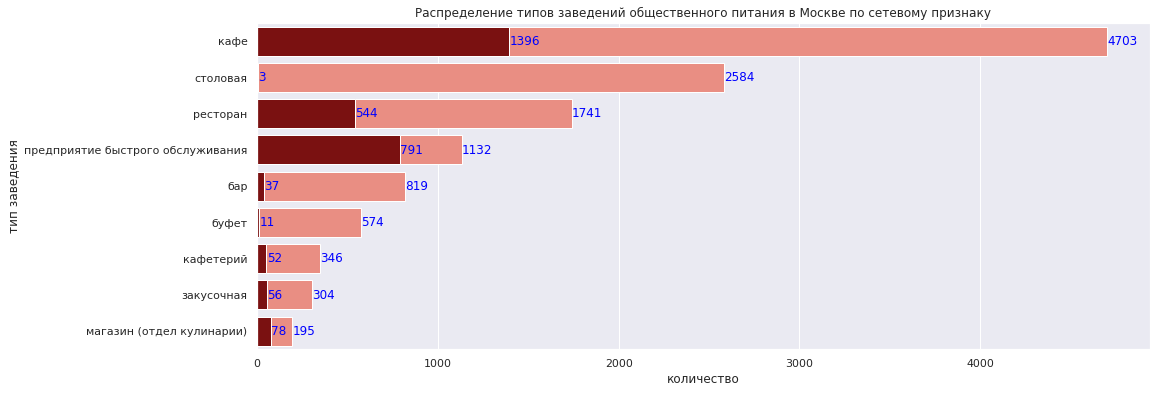

In [91]:
# График соотношения сетевых и несетевых заведений по формату
formats = formats.sort_values('total_qty', ascending=False)
fig, ax = plt.subplots(figsize=(16, 6))
sns.barplot(
    y='object_type', x='non_chain_qty', data=formats, orient='h', color='salmon', order=formats['object_type'])
sns.barplot(
    y='object_type', x='chain_qty', data=formats, orient='h', color='darkred', order=formats['object_type'])
for p in ax.patches:
    width = p.get_width()
    ax.text(width + 1,
            p.get_y() + p.get_height() / 2,
            '{:.0f}'.format(width),
            ha = 'left',
            va = 'center', color='blue')
plt.title('Распределение типов заведений общественного питания в Москве по сетевому признаку')
plt.xlabel('количество')
plt.ylabel('тип заведения')
plt.show()

**Чуть менее четверти всех кафе и ресторанов - сетевые. Формат где сетевых заведение заметно больше (41%) чем в остальных - бистро, что можно объяснить наличием в этом сегменте крупных сетевых брендов и франшиз. Довольно большая доля сетевых отделов кулинарии имеет то же объяснение - распространение объектов сетевого ритейла** 

### Распределение посадочных мест в сетевых заведениях

In [92]:
# Срез по сетевым заведениям
chain_grouped = df.query(
    'chain == "сетевое"')
chain_grouped.sample(3)

,id,object_name,chain,object_type,address,number
13333,194194,суши wok,сетевое,предприятие быстрого обслуживания,"город Москва, Открытое шоссе, дом 5, корпус 13",4
11962,94947,восточный базар,сетевое,ресторан,"город Москва, Ходынский бульвар, дом 4",50
6277,138495,хинкальная,сетевое,кафе,"город Москва, Большая Серпуховская улица, дом 29",45


In [93]:
# Описательные статистики распределения кол-ва мест
chain_grouped['number'].describe()

count   2968.00
mean      52.92
std       57.14
min        0.00
25%       15.00
50%       40.00
75%       72.00
max      580.00
Name: number, dtype: float64

In [94]:
print('95 персентиль {:.0f}'.format(np.percentile(chain_grouped['number'],95)))
print('99 персентиль {:.0f}'.format(np.percentile(chain_grouped['number'],99)))

95 персентиль 159
99 персентиль 275


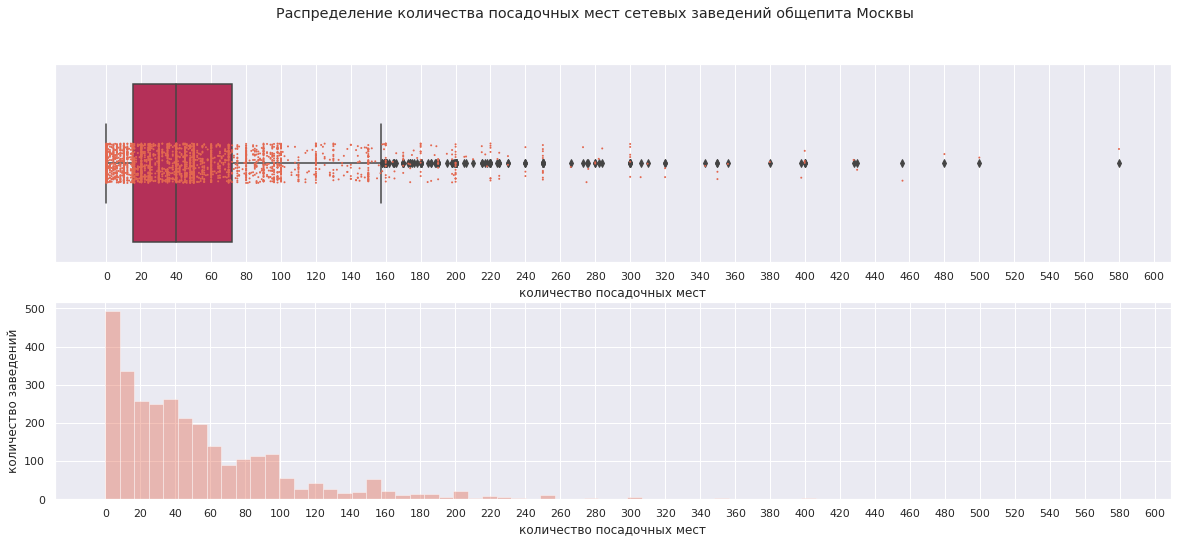

In [95]:
# Распределение количества посадочных мест в сетевых заведениях
fig, axes = plt.subplots(2, 1, figsize=(20, 8))
fig.suptitle('Распределение количества посадочных мест сетевых заведений общепита Москвы')
sns.boxplot(chain_grouped['number'], palette="rocket_r", orient='h', ax=axes[0])
sns.stripplot(chain_grouped['number'], size = 2, ax=axes[0])
axes[0].set_xlabel('количество посадочных мест')
axes[0].set_xticks(np.arange(0,620,20))
sns.distplot(chain_grouped['number'], kde=False, bins=70, ax=axes[1])
axes[1].set_xlabel('количество посадочных мест')
axes[1].set_ylabel('количество заведений')
axes[1].set_xticks(np.arange(0,620,20))
plt.show()

In [96]:
# Группировка среза по сетевым заведениям по количеству точек в ести
chain_dist = chain_grouped.groupby('object_name').agg({'id':'count', 'number':'mean'}).reset_index()
chain_dist.columns = ['object_name', 'unit_qty', 'mean_number']
chain_dist.sort_values('unit_qty', ascending=False).head(10)

,object_name,unit_qty,mean_number
563,шоколадница,157,57.18
25,kfc,155,55.34
330,макдоналдс,151,87.12
109,бургер кинг,137,46.65
521,теремок,94,25.61
311,крошка картошка,90,21.86
159,домино'с пицца,90,18.34
339,милти,72,1.33
505,суши wok,72,6.71
367,папа джонс,51,22.04


**Группировка на основе количества заведений в сети даст только приблизительную общую картину, поскольку наименования названий сетевых заведений записаны в разных форматах что влечет за собой дублирование одних и тех же заведений, для более точной группировки необходима ручная обработка сетевых названий.**

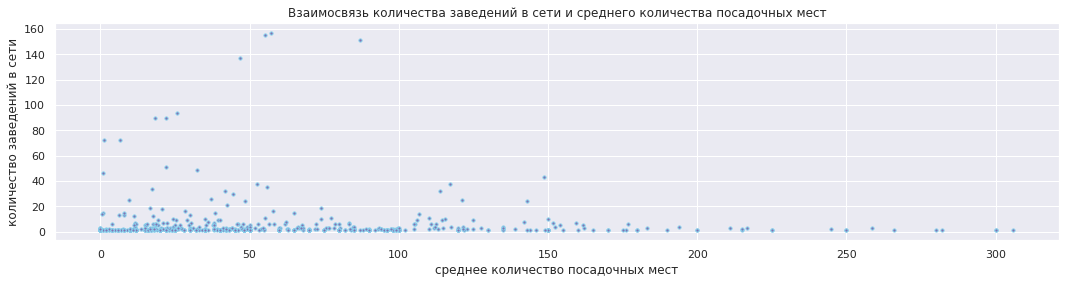

In [97]:
# График распределения количества посадочных мест во взаимосвязи с количеством точек в сети
fig, ax = plt.subplots(figsize=(18, 4))
sns.scatterplot(data=chain_dist, x='mean_number', y='unit_qty', s=10, color='m', edgecolor="skyblue", linewidth=1)
plt.title('Взаимосвязь количества заведений в сети и среднего количества посадочных мест')
plt.xlabel('среднее количество посадочных мест')
plt.ylabel('количество заведений в сети')
plt.show()

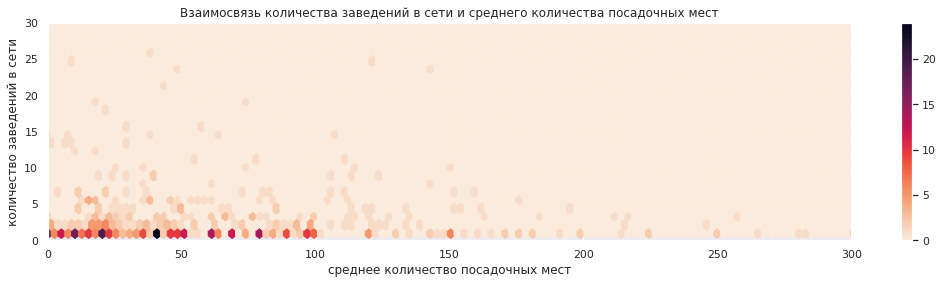

In [98]:
# График распределения количества посадочных мест во взаимосвязи с количеством точек в сети
fig, ax = plt.subplots(figsize=(18, 4))
plt.hexbin(chain_dist['mean_number'], chain_dist['unit_qty'], gridsize=120, cmap='rocket_r')
plt.xlim(0, 300)
plt.ylim(0, 30)
plt.title('Взаимосвязь количества заведений в сети и среднего количества посадочных мест')
plt.xlabel('среднее количество посадочных мест')
plt.ylabel('количество заведений в сети')
plt.colorbar()
plt.show()

**Медианное количество посадочных мест - около 40, 50% сетевых заведений имеют от 15 до 72 посадочных мест. Менее 100 заведений имеют более 100 посадочных мест, хотя есть огромные точки где места исчисляются сотнями, но их очень мало. Только 5% сетевых заведений имеют больше 159 мест посадки. Сетевых заведений с маленькой посадкой - большинство, стоит отметить что широко распространены сетевые заведения на фудкортах где за ними не закреплены конкретные посадочные места.**

<br>**Зависимость посадочных мест от количества точек в сети можно вывести только приблизительно из-за варьиативности записей наименования сети в датафрейме, однако можно сказать что в общем, типичная сеть - ограничена диапазоном до 5 точек с вместимостью посадки до 50-60 мест. На число посадочных мест в сетевых заведения влияют много других субъективных факторов.**

### Среднее количество посадочных мест

In [99]:
# Группировка среднего количества посадочных мест по типу заведения
avg_seats = df.groupby(
    ['object_type'])['number'].agg(['mean','median']).reset_index().sort_values('mean', ascending=False)
avg_seats.columns = ['object_type', 'avg_number', 'median_number']
avg_seats['avg_number'] = round(avg_seats['avg_number']).astype('int')
avg_seats.style.background_gradient(cmap=cm, subset=['avg_number']).background_gradient(cmap=cm, subset=['median_number'])

,object_type,avg_number,median_number
8,столовая,130,103
7,ресторан,97,80
1,буфет,51,32
0,бар,43,35
3,кафе,40,30
6,предприятие быстрого обслуживания,21,5
4,кафетерий,9,6
2,закусочная,8,0
5,магазин (отдел кулинарии),6,0


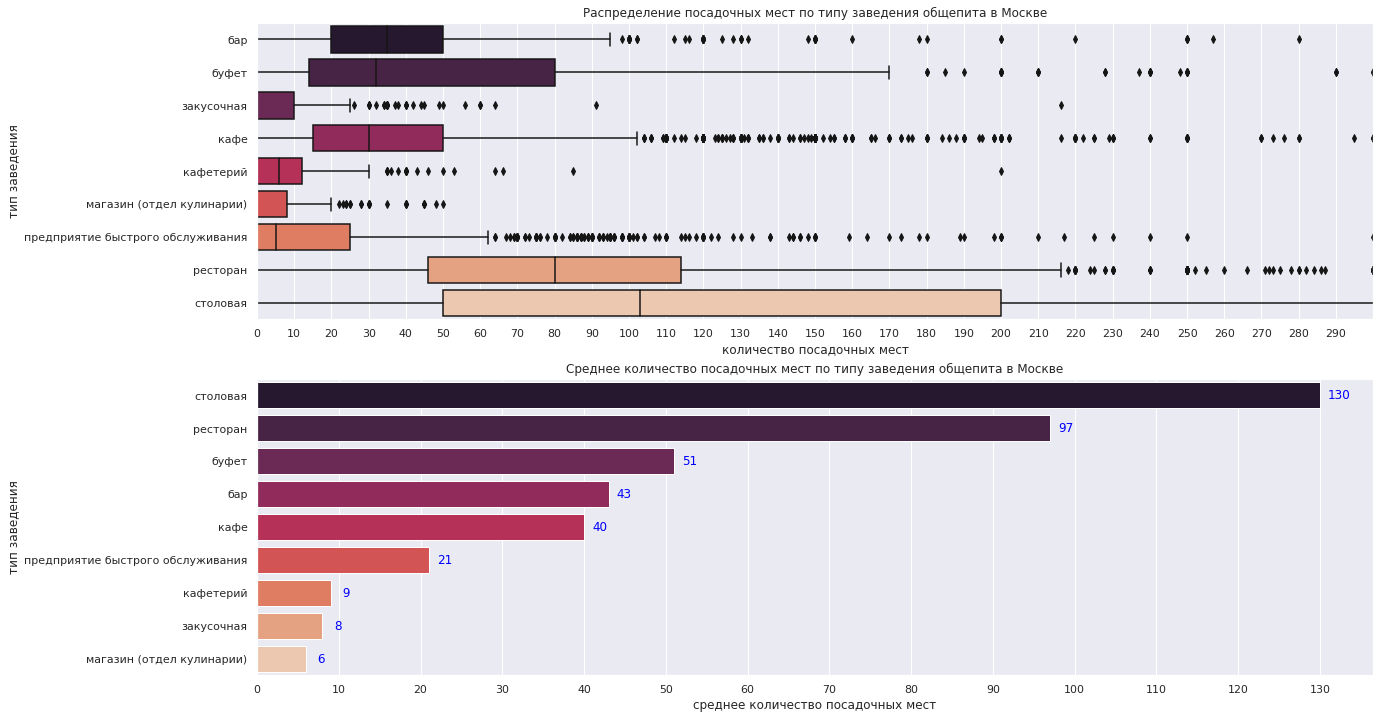

In [100]:
# Графикb распределенияколичества посадочных мест
fig, axes = plt.subplots(2, 1, figsize=(20, 12))
sns.boxplot(y='object_type', x='number', data=df, orient='h', palette='rocket', ax=axes[0])
axes[0].set_xlabel('количество посадочных мест')
axes[0].set_ylabel('тип заведения')
axes[0].set_xlim(0,300)
axes[0].set_xticks(np.arange(0,300,10))
axes[0].set_title('Распределение посадочных мест по типу заведения общепита в Москве')
sns.barplot(
    y='object_type', x='avg_number', data=avg_seats, orient='h', order=avg_seats['object_type'],  palette='rocket', ax=axes[1])
# Добавление процентных долей
for p in axes[1].patches:
    width = p.get_width()
    axes[1].text(width + 1,
            p.get_y() + p.get_height() / 2,
            '{:2.0f}'.format(width),
            ha = 'left',
            va = 'center', color='blue')
axes[1].set_xlabel('среднее количество посадочных мест')
axes[1].set_ylabel('тип заведения')
axes[1].set_xticks(np.arange(0,140,10))
axes[1].set_title('Среднее количество посадочных мест по типу заведения общепита в Москве')
plt.show()

**В среднем, самое большое количество мест у столовых, разница с медианным значением может говорить о наличии очень больших столовых с большим количеством посадочных мест. Схожая картина у остальных форматов, самый большой разброс значений у бистро. У закусочных и отделов кулинарии очень часто вообще нет посадочных мест, хотя в среднем их 8 и 6 соответственно.**

### Выделение улиц в отдельный столбец

In [101]:
def street_mark(data):

# Удаление Москвы
    data['street']=data['address'].replace(r'город Москва', '', regex=True)                             
# Удаление данных по частям адреса
    data['street']=data['street'].replace(r'дом \d+[-+/0-9a-zA-Zа-яА-ЯёЁ]*', '', regex=True) 
    data['street']=data['street'].replace(r'корпус \w+[-+/0-9a-zA-Zа-яА-ЯёЁ]*', '', regex=True)
    data['street']=data['street'].replace(r'строение \d+[-+/0-9a-zA-Zа-яА-ЯёЁ]*', '', regex=True)
    data['street']=data['street'].replace(r'сооружение \d+[-+/0-9a-zA-Zа-яА-ЯёЁ]*', '', regex=True)
    data['street']=data['street'].replace(r'домовладение \d+[-+/0-9a-zA-Zа-яА-ЯёЁ]*', '', regex=True)
    data['street']=data['street'].replace(r'владение \d+[-+/0-9a-zA-Zа-яА-ЯёЁ]*', '', regex=True)

    data['street']=data['street'].replace(r'\B, ', '', regex=True)
    data['street']=data['street'].replace(r', \B', '', regex=True)

In [102]:
# Добавление столбца с названием улиц
street_mark(df)
df.head()

,id,object_name,chain,object_type,address,number,street
0,151635,сметана,несетевое,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова
1,77874,родник,несетевое,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина
2,24309,кафе «академия»,несетевое,кафе,"город Москва, Абельмановская улица, дом 6",95,Абельмановская улица
3,21894,пиццетория,сетевое,кафе,"город Москва, Абрамцевская улица, дом 1",40,Абрамцевская улица
4,119365,кафе «вишневая метель»,несетевое,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,Абрамцевская улица


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 7 columns):
id             15366 non-null int64
object_name    15366 non-null object
chain          15366 non-null object
object_type    15366 non-null category
address        15366 non-null object
number         15366 non-null int64
street         15366 non-null object
dtypes: category(1), int64(2), object(4)
memory usage: 735.8+ KB


### Топ 10 улиц с самым большим количеством заведений общепита

In [104]:
# Чтение файла с районами и координатами
district_data = pd.read_csv('https://drive.google.com/uc?export=download&id=1OEh6Ns_vRptcQ4emofQyeUOc9r2jejUv', sep=';')
district_data = district_data.rename({'lattitude': 'latitude'}, axis=1) #Исправление опечатки в названиях столбцов
district_data.head()

,address,adm_district,city_district,latitude,longitude
0,"город Москва, улица Егора Абакумова, дом 9",Северо-восточный,Ярославский,55.88,37.71
1,"город Москва, улица Талалихина, дом 2/1, корпус 1",Центральный,Таганский,55.74,37.67
2,"город Москва, Абельмановская улица, дом 6",Центральный,Таганский,55.74,37.67
3,"город Москва, Абрамцевская улица, дом 1",Северо-восточный,Лианозово,55.89,37.57
4,"город Москва, Абрамцевская улица, дом 9, корпус 1",Северо-восточный,Лианозово,55.90,37.57


**Геоданные адресов и административное деление получены и предобработаны с помошью сервиса https://dadata.ru/ отдельно, сведены в файл с сохранением оригинальной индексации**

In [105]:
# Объединение рабочего датасета и датасета с районами и координатами
df_merged = df.merge(district_data, left_index=True, right_index=True, on='address')
df_merged.head()

,id,object_name,chain,object_type,address,number,street,adm_district,city_district,latitude,longitude
0,151635,сметана,несетевое,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова,Северо-восточный,Ярославский,55.88,37.71
1,77874,родник,несетевое,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина,Центральный,Таганский,55.74,37.67
2,24309,кафе «академия»,несетевое,кафе,"город Москва, Абельмановская улица, дом 6",95,Абельмановская улица,Центральный,Таганский,55.74,37.67
3,21894,пиццетория,сетевое,кафе,"город Москва, Абрамцевская улица, дом 1",40,Абрамцевская улица,Северо-восточный,Лианозово,55.89,37.57
4,119365,кафе «вишневая метель»,несетевое,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,Абрамцевская улица,Северо-восточный,Лианозово,55.90,37.57


In [106]:
# Адреса по которым отсутствует район
df_merged.query(
    'city_district != city_district')

,id,object_name,chain,object_type,address,number,street,adm_district,city_district,latitude,longitude
5227,145283,кафетерий при азк 317,несетевое,кафетерий,"город Москва, 87-й километр Московской Кольцев...",20,87-й километр Московской Кольцевой Автодороги,NaN,NaN,nan,nan
5286,89416,kfc,сетевое,кафе,"город Москва, 82-й километр Московской Кольцев...",94,82-й километр Московской Кольцевой Автодороги,NaN,NaN,55.12,38.24
5287,138207,самарканд,несетевое,кафе,"город Москва, 82-й километр Московской Кольцев...",90,82-й километр Московской Кольцевой Автодороги,NaN,NaN,55.12,38.24
5328,59188,макдоналдс,сетевое,ресторан,"город Москва, 87-й километр Московской Кольцев...",100,87-й километр Московской Кольцевой Автодороги,NaN,NaN,nan,nan
5329,83708,теремок,сетевое,кафе,"город Москва, 87-й километр Московской Кольцев...",40,87-й километр Московской Кольцевой Автодороги,NaN,NaN,nan,nan
5554,23249,метро к&к,сетевое,кафе,"город Москва, 104-й километр Московской Кольце...",80,104-й километр Московской Кольцевой Автодороги,NaN,NaN,55.12,38.24
6021,23969,артико,несетевое,кафе,"город Москва, 38-й километр Московской Кольцев...",94,38-й километр Московской Кольцевой Автодороги,NaN,NaN,55.12,38.24
6119,25516,ресторан «бони мария»,несетевое,ресторан,"город Москва, 42-й километр Московской Кольцев...",170,42-й километр Московской Кольцевой Автодороги,NaN,NaN,nan,nan
6606,19912,сахара,несетевое,кафе,"город Москва, 56-й километр Московской Кольцев...",1,56-й километр Московской Кольцевой Автодороги,NaN,NaN,55.12,38.24
6782,144529,сабвей,сетевое,кафе,"город Москва, 74-й километр Московской Кольцев...",8,74-й километр Московской Кольцевой Автодороги,NaN,NaN,55.73,37.04


**Пропуски в районах характерны для района Мосрентген и заведений на МКАД, количество таких строк незначительно, поэтому на итоговую точность выводов они вряд ли повлияют.**

In [107]:
# Топ 10 локаций Москвы не включая Зеленоград
location_top = df_merged.query('street != "город Зеленоград"').groupby(
    'street').agg({'id':'nunique'}).sort_values('id', ascending=False).head(10).reset_index()
location_top.columns = ['street', 'unit_qty']
location_top.style.background_gradient(cmap=cm)

,street,unit_qty
0,проспект Мира,204
1,Профсоюзная улица,183
2,Ленинградский проспект,173
3,Пресненская набережная,167
4,Варшавское шоссе,162
5,Ленинский проспект,148
6,проспект Вернадского,130
7,Кутузовский проспект,114
8,Каширское шоссе,112
9,Кировоградская улица,110


In [108]:
df_merged.query('street == "город Зеленоград"').head(3)

,id,object_name,chain,object_type,address,number,street,adm_district,city_district,latitude,longitude
1405,20199,это,несетевое,кафе,"город Москва, город Зеленоград, корпус 401",35,город Зеленоград,Зеленоградский,Матушкино,56.00,37.21
1406,68113,френдс,несетевое,кафе,"город Москва, город Зеленоград, корпус 435",34,город Зеленоград,Зеленоградский,Матушкино,56.00,37.21
1407,20105,кафе «граф монте-кристо»,несетевое,кафе,"город Москва, город Зеленоград, корпус 436",40,город Зеленоград,Зеленоградский,Матушкино,56.00,37.21


**В топ локаций - улиц попали в основном длинные проспекты и шоссе, основные транспортные магистрали, за исключением Пресненской набережной. Город Зеленоград можно рассматривать как отдельную географическую локацию, административно входящую в г. Москва, поэтому он исключен из топа локаций.**

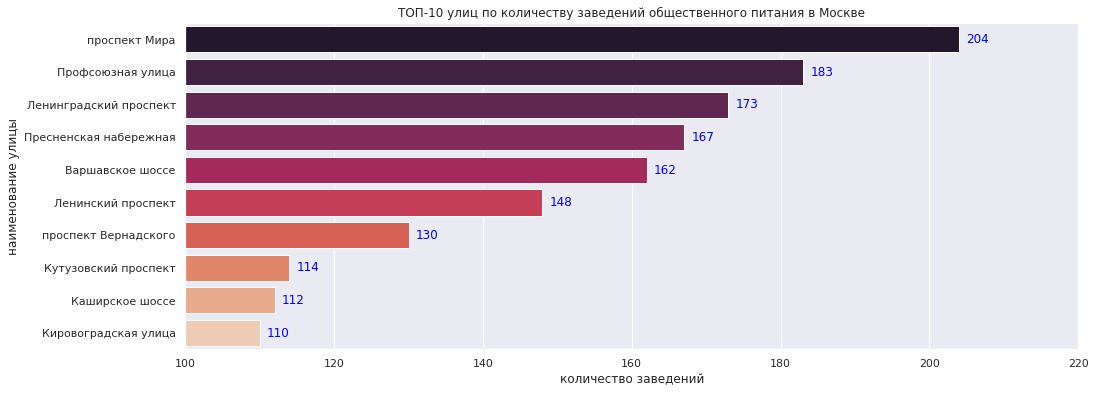

In [109]:
# График распределения среднего количества посадочных мест
fig, ax = plt.subplots(figsize=(16, 6))
ax = sns.barplot(y='street', x='unit_qty', data=location_top, orient='h', order=location_top['street'],  palette='rocket')
# Добавление процентных долей
for p in ax.patches:
    width = p.get_width()
    ax.text(width + 1,
            p.get_y() + p.get_height() / 2,
            '{:2.0f}'.format(width),
            ha = 'left',
            va = 'center', color='blue')
plt.xlim(100, 220)
plt.title('ТОП-10 улиц по количеству заведений общественного питания в Москве')
plt.xlabel('количество заведений')
plt.ylabel('наименование улицы')
plt.show()

In [110]:
# Создание списка топ улиц
topstreet = location_top['street'].tolist()

In [111]:
# Топ 10 локаций по числу заведений в разрезе районов
district_top = df_merged.query('street in @topstreet').groupby(
    ['street', 'city_district']).agg({'id':'count'}).reset_index()
district_top.columns = ['street', 'city_district', 'unit_qty']
district_top.sort_values(
    ['street','unit_qty'],ascending=False).groupby(
    'street').head(10).style.background_gradient(cmap=cm)

,street,city_district,unit_qty
42,проспект Мира,Мещанский,63
45,проспект Мира,Свиблово,62
41,проспект Мира,Алексеевский,52
43,проспект Мира,Останкинский,20
44,проспект Мира,Ростокино,6
46,проспект Мира,Ярославский,1
40,проспект Вернадского,Тропарево-Никулино,67
39,проспект Вернадского,Раменки,32
38,проспект Вернадского,Проспект Вернадского,16
37,проспект Вернадского,Ломоносовский,14


**Почти все улицы проходят по нескольким районам Москвы, поэтому лучше определить в каком именно районе каждой улицы находятся максимальное число заведений.**

In [112]:
# Шруппировка топ локаций по району наибольшей представленности точек общепита по количесвту
district_top.sort_values(
    ['street','unit_qty'],ascending=False).groupby(
    'street').head(1).sort_values('unit_qty', ascending=False).reset_index(drop=True).style.background_gradient(cmap=cm)

,street,city_district,unit_qty
0,Пресненская набережная,Пресненский,167
1,Кировоградская улица,Чертаново Центральное,79
2,проспект Вернадского,Тропарево-Никулино,67
3,Ленинградский проспект,Аэропорт,65
4,проспект Мира,Мещанский,63
5,Кутузовский проспект,Дорогомилово,61
6,Каширское шоссе,Нагатино-Садовники,49
7,Варшавское шоссе,Чертаново Южное,43
8,Профсоюзная улица,Теплый Стан,40
9,Ленинский проспект,Гагаринский,39


**Пресненнская набережная номер 1 по числу заведений т.к. рядом находится городской деловой центр Москва-сити, стоит также отметить Профсоюзную улицу в районе Теплый стан, где находится сосредоточение крупных торговых объектов, остальные локации - важнейшие, крупные и протяженные транспортные артерии города.**

### Число улиц с одним объектом общественного питания

In [113]:
# Группировка улиц с одним заведением
one_by_street = df_merged.groupby(['city_district', 'adm_district', 'street']).agg({'id':'nunique'}).reset_index()
one_by_street = one_by_street.query('id == 1')
one_by_street.head(5)

,city_district,adm_district,street,id
11,Алексеевский,Северо-восточный,1-й Рижский переулок,1
15,Алексеевский,Северо-восточный,Зубарев переулок,1
16,Алексеевский,Северо-восточный,Кулаков переулок,1
17,Алексеевский,Северо-восточный,Кучин переулок,1
20,Алексеевский,Северо-восточный,Рижский проезд,1


In [114]:
# Группировка количества улиц с одним заведением по району
one_by_street.groupby(
    ['city_district', 'adm_district']).agg(
    {'street':'count'}).sort_values('street', ascending=False).reset_index().style.background_gradient(cmap=cm)

,city_district,adm_district,street
0,Новомосковский,Новомосковский,43
1,Троицкий,Троицкий,34
2,Таганский,Центральный,31
3,Басманный,Центральный,27
4,Хамовники,Центральный,27
5,Тверской,Центральный,23
6,Пресненский,Центральный,22
7,Марьина роща,Северо-восточный,18
8,Сокольники,Восточный,15
9,Арбат,Центральный,13


**<br>На первые две позиции попали Новомосковсский и Троицкий административные округа, куда формально входят не районы а поселения, поэтому эти географические локации нужно рассматривать отдельно.**

<br>**В самой Москве лидеры по количеству улиц с 1 заведением, Таганский, Басманный, Тверской, Пресненский районы, Хамовники. Это локации с исторической застройкой окружающие Кремль, где много небольших улочек. На окраинах, наоборт, в районах очень редко встретишь большое количество улиц где только одно заведение общепита, в этих локациях также много крупных торговых центров.**

### Интерактивная карта распределения заведений общепита Москвы

In [115]:
# Загрузка файла с административным делением Москвы и геограницами районов
districts = geopandas.read_file(
    'https://drive.google.com/uc?export=download&id=1TqMLEBvA34_m3M_FPhTwgRBx2tVcNhes', driver='GeoJSON')

**Данные по геокоординатам районов и округов Москвы взяты с https://gis-lab.info/qa/moscow-atd.html**

In [116]:
# Просмотр таблицы с геограницами районов
districts.head()

,NAME,OKATO,OKTMO,NAME_AO,OKATO_AO,ABBREV_AO,TYPE_MO,geometry
0,Киевский,45298555,45945000,Троицкий,45298000,Троицкий,Поселение,"MULTIPOLYGON (((36.80310 55.44083, 36.80319 55..."
1,Филёвский Парк,45268595,45328000,Западный,45268000,ЗАО,Муниципальный округ,"POLYGON ((37.42765 55.74821, 37.42849 55.74875..."
2,Новофёдоровское,45298567,45954000,Троицкий,45298000,Троицкий,Поселение,"POLYGON ((36.80357 55.45162, 36.80451 55.46551..."
3,Роговское,45298575,45956000,Троицкий,45298000,Троицкий,Поселение,"POLYGON ((36.93724 55.24139, 36.93726 55.24161..."
4,"""Мосрентген""",45297568,45953000,Новомосковский,45297000,Новомосковский,Поселение,"POLYGON ((37.43956 55.62731, 37.44018 55.63042..."


In [117]:
# Приведение столбца с районами к нижнему регистру перед объединением
df_merged['city_district'] = df_merged['city_district'].str.lower()

In [118]:
# Обработка файлов с геограницами, для объединения с датфреймом с заведениями общепита
districts.columns = ['name', 'okato', 'oktmo', 'adm_distr', 'adm_okato', 'adm_short_name', 'adm_type', 'geometry']
districts['name'] = districts['name'].str.lower() # Нижний регистр
districts['name'] = districts['name'].str.replace('ё','е') # Замена ё на е в названиях районов для объединения

**После преобработки файла с районами нужно присоеденить количество заведений сгруппированное по району**

In [119]:
# Группировка районов по количеству точек общепита
units_merged = df_merged.groupby('city_district')['id'].count().reset_index().rename(columns={'id': 'unit_qty'})
units_merged.head()

,city_district,unit_qty
0,академический,128
1,алексеевский,129
2,алтуфьевский,33
3,арбат,269
4,аэропорт,125


In [120]:
# Объединение таблицы с геограницами районов и таблиц с количеством заведений на район
districts = districts.merge(units_merged, left_on='name', right_on='city_district')
districts.head()

,name,okato,oktmo,adm_distr,adm_okato,adm_short_name,adm_type,geometry,city_district,unit_qty
0,филевский парк,45268595,45328000,Западный,45268000,ЗАО,Муниципальный округ,"POLYGON ((37.42765 55.74821, 37.42849 55.74875...",филевский парк,124
1,матушкино,45272562,45331000,Зеленоградский,45272000,ЗелАО,Муниципальный округ,"POLYGON ((37.17853 56.00795, 37.18083 56.00825...",матушкино,62
2,внуково,45268552,45317000,Западный,45268000,ЗАО,Муниципальный округ,"MULTIPOLYGON (((37.23021 55.58532, 37.23537 55...",внуково,29
3,савелки,45272568,45377000,Зеленоградский,45272000,ЗелАО,Муниципальный округ,"POLYGON ((37.20946 56.00083, 37.20975 56.00088...",савелки,50
4,силино,45272572,45332000,Зеленоградский,45272000,ЗелАО,Муниципальный округ,"POLYGON ((37.13160 56.01645, 37.13266 56.01678...",силино,34


In [121]:
# Исключение строк где отсутствуют координаты
df_merged = df_merged.query('latitude == latitude and longitude == longitude')

**Интерактивная карта будет создана с помощью библиотеки folium, представляет карту Москвы с границами районов с учетом плотности распределени количества точек. Точки заведений по умолчанию скрыты для производительности, их можно подключить отдельно.**

<br>**При наведении на район можно получить названия района, округа и количество заведений**
<br>**При включении точек общепита можно будет получить название каждой точки по наведению**

In [122]:
# Построение интерактивной карты заведений общепита по Москве с помощь Folium
m = folium.Map(location=[55.753215, 37.622504], zoom_start=10)

# Цветовая интенсивность шкалы плотности распределения
bins = [1, 10, 60, 100, 200, 350, 600, 850]

# Фоновая картограмма - хороплет для районов c плотностью заведений
folium.Choropleth(geo_data=districts, 
                  name='все районы', 
                  data=units_merged, 
                  columns=['city_district', 'unit_qty'],
                  key_on='feature.properties.name', fill_color='YlOrRd',
                  fill_opacity=0.4, line_opacity=0.7,
                  legend_name='Распределение заведений общепита по районам Москвы',
                  bins=bins).add_to(m)

# Задание функции прозрачности площади областей и границ
style_function = lambda x: {'fillColor': 'ffffff','color': 'black','weight': 0,'fillOpacity': 0}


# Слой с количеством заведений по районам, всплывающие окна с данными
districtgeo = folium.GeoJson(districts,
                             name='данные по районам',
                             style_function=style_function,
                             tooltip=folium.GeoJsonTooltip(
                                 fields=['name', 'adm_distr', 'unit_qty'], 
                                 aliases=['Район', 'Округ', 'Кол-во точек общепита'],
                                 localize=False), smooth_factor = 0).add_to(m)

# Окно поиска по району
statesearch = Search(layer=districtgeo,
                     geom_type='Polygon',
                     placeholder='Поиск по району',
                     collapsed=False, search_label='name').add_to(m)

# Слой с точками общепита, по умолчанию скрыт для производительности
units_layer = folium.FeatureGroup(name='точки общепита', show=False)
m.add_child(units_layer)

# Данные для слоя
units = df_merged[['latitude', 'longitude', 'object_name']].values.tolist()

for row in units:
    folium.Circle(location=row[:2], radius=5, popup=row[2], fill=True, color='red').add_to(units_layer)

folium.LayerControl().add_to(m)

m.save('folium_map_v2.html')

IFrame('folium_map_v2.html', width='100%', height='750px')

**Данные интерактивной карты подтверждают выводы о сосреготочении заведений общепита в ЦАО и вдоль крупных транспортных магистралей, районов с высокой плотностью крупных ТЦ, высокую плотность в районе Москва-сити.**

### Распределение количества посадочных мест для улиц с большим количеством объектов общественного питания

In [123]:
# Срез по заведениям входящим в топ локаций
seats = df_merged.query('street in @topstreet')
seats.head()

,id,object_name,chain,object_type,address,number,street,adm_district,city_district,latitude,longitude
151,155973,кафе «андерсон»,сетевое,кафе,"город Москва, Варшавское шоссе, дом 2",150,Варшавское шоссе,Южный,донской,55.70,37.62
152,23618,кафе «subway»,сетевое,кафе,"город Москва, Варшавское шоссе, дом 7, корпус 1",36,Варшавское шоссе,Южный,донской,55.70,37.62
153,155852,кафе «ламаджо»,несетевое,кафе,"город Москва, Варшавское шоссе, дом 29",30,Варшавское шоссе,Южный,донской,55.69,37.62
154,152556,шаурма в пите,несетевое,предприятие быстрого обслуживания,"город Москва, Варшавское шоссе, дом 72, корпус 2",0,Варшавское шоссе,Южный,нагорный,55.66,37.62
155,120658,выпечка,несетевое,кафетерий,"город Москва, Варшавское шоссе, дом 100",2,Варшавское шоссе,Южный,нагорный,55.65,37.62


In [124]:
# Описательные статистики распределения посадочных мест топ локаций
seats['number'].describe()

count   1503.00
mean      57.97
std       90.04
min        0.00
25%       12.00
50%       39.00
75%       75.00
max     1700.00
Name: number, dtype: float64

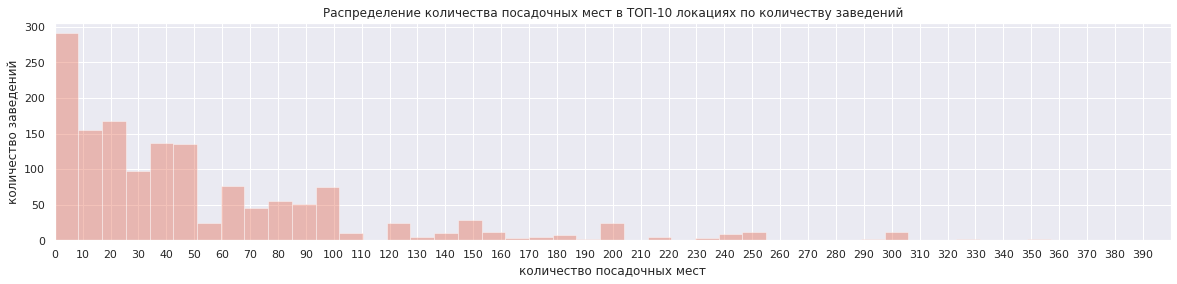

In [125]:
# Построение диаграмы распределения посадочных мест в локациях ТОП-10
fig, axes = plt.subplots(figsize=(20, 4))
sns.set_palette("rocket_r", 2, .85  ,color_codes=True)
ax = sns.distplot(seats['number'], kde=False, bins=200)
ax.set_xticks(np.arange(0,400,10))
plt.xlim(0,400)
plt.title('Распределение количества посадочных мест в ТОП-10 локациях по количеству заведений')
plt.xlabel('количество посадочных мест')
plt.ylabel('количество заведений')
plt.show()

**Распределение посадочных мест топ локация в целом похоже на распределение по всей Москве, 50% заведений имеют посадку от 12 до 75 мест, хотя встречаются заведения с посадкой больше 100 мест. Медианная посадка - 39 мест, средняя, из за большого размаха значений - 57**

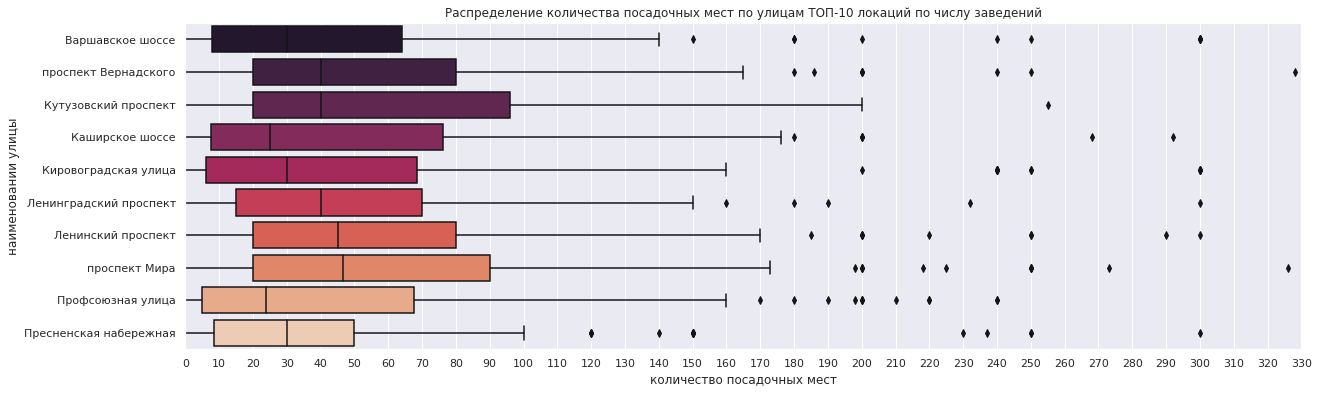

In [126]:
# Диаграмма размах по количества посадочных мест по локациям из ТОП-10
fig, ax = plt.subplots(figsize=(20,6))
sns.boxplot(y="street", x='number', data=seats, orient='h', palette='rocket')
ax.set_xticks(np.arange(0,400,10))
plt.title('Распределение количества посадочных мест по улицам ТОП-10 локаций по числу заведений')
ax.set_xlabel('количество посадочных мест')
ax.set_ylabel('наименовании улицы')
ax.set_xlim(0, 330)
plt.show()

**Можно отметить малый разброс значений в посадочных местах в районе Пресненской набережной - район Москва-сити, а также больший разброс вдоль Кутузовского проспекта и проспекта Мира.**

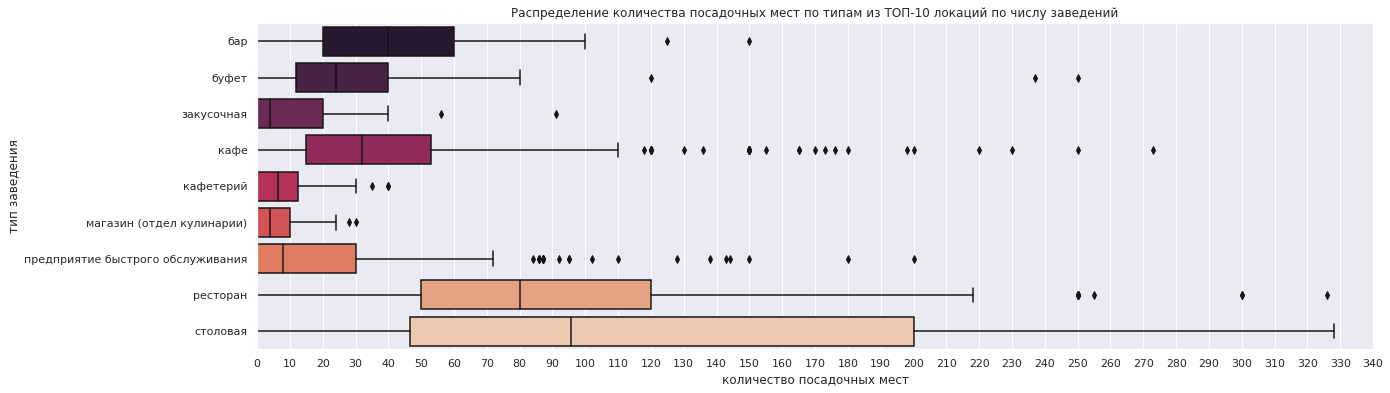

In [127]:
fig, ax = plt.subplots(figsize=(20,6))
sns.boxplot(y="object_type", x='number', data=seats, orient='h', palette='rocket')
ax.set_xticks(np.arange(0,400,10))
plt.title('Распределение количества посадочных мест по типам из ТОП-10 локаций по числу заведений')
ax.set_xlabel('количество посадочных мест')
ax.set_ylabel('тип заведения')
ax.set_xlim(0, 340)
plt.show()

**Распределение посадки по типам заведений в топ локациях не на много отличается от распределения в целом по Москве, кроме буфетов, в топ локациях 50% таких заведений имеют посадку от 25 до 40 мест, по Москве от 15 до 80. Медианные значения посадки трех самых распространенных форматов кафе, столовая и ресторан практически одинаковы и в топ локациях и в целом по Москве**

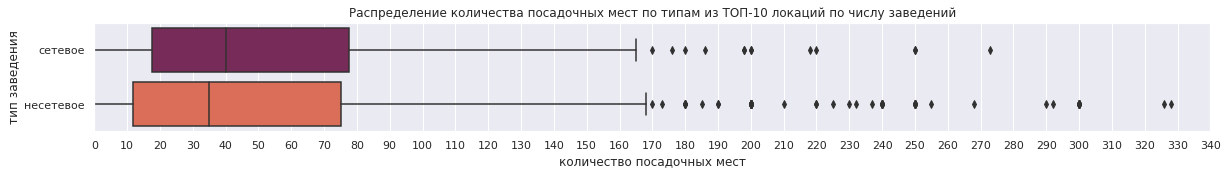

In [128]:
fig, ax = plt.subplots(figsize=(20,2))
sns.boxplot(y="chain", x='number', data=seats, orient='h', palette='rocket')
ax.set_xticks(np.arange(0,400,10))
plt.title('Распределение количества посадочных мест по типам из ТОП-10 локаций по числу заведений')
ax.set_xlabel('количество посадочных мест')
ax.set_ylabel('тип заведения')
ax.set_xlim(0, 340)
plt.show()

**Распределение посадочных мест сетевых и несетевых заведений в топ локациях почти не различаются, у сетевых заведений посадка возможно больше стандартизирована в силу своей концепции.**

In [129]:
# Выделение районов с максимальным количеством посадочных мест в топ локациях
top_distr = district_top.sort_values(
    ['street','unit_qty'],ascending=False).groupby(
    'street').head(1).sort_values('unit_qty', ascending=False).reset_index(drop=True)

district_top_loc = top_distr['city_district'].str.lower().tolist()

In [130]:
seats.query('city_district in @district_top_loc').head()

,id,object_name,chain,object_type,address,number,street,adm_district,city_district,latitude,longitude
156,26279,ресторан «макдоналдс»,сетевое,кафе,"город Москва, Варшавское шоссе, дом 143А",70,Варшавское шоссе,Южный,чертаново южное,55.58,37.60
165,141687,пироговая рогова,несетевое,кафе,"город Москва, проспект Вернадского, дом 9/10",42,проспект Вернадского,Юго-западный,гагаринский,55.69,37.53
173,19716,буфет,несетевое,буфет,"город Москва, проспект Вернадского, дом 86, ст...",40,проспект Вернадского,Западный,тропарево-никулино,55.66,37.47
174,69990,панорама 93,несетевое,ресторан,"город Москва, проспект Вернадского, дом 93",60,проспект Вернадского,Западный,тропарево-никулино,55.67,37.50
175,20147,кафе «пекарня «мюнгер»»,несетевое,кафе,"город Москва, проспект Вернадского, дом 97, ко...",30,проспект Вернадского,Западный,тропарево-никулино,55.67,37.49


In [131]:
# Топ районы для топ локаций
district_top.sort_values(
    ['street','unit_qty'],ascending=False).groupby(
    'street').head(1).sort_values('unit_qty', ascending=False).reset_index(drop=True).style.background_gradient(cmap=cm)

,street,city_district,unit_qty
0,Пресненская набережная,Пресненский,167
1,Кировоградская улица,Чертаново Центральное,79
2,проспект Вернадского,Тропарево-Никулино,67
3,Ленинградский проспект,Аэропорт,65
4,проспект Мира,Мещанский,63
5,Кутузовский проспект,Дорогомилово,61
6,Каширское шоссе,Нагатино-Садовники,49
7,Варшавское шоссе,Чертаново Южное,43
8,Профсоюзная улица,Теплый Стан,40
9,Ленинский проспект,Гагаринский,39


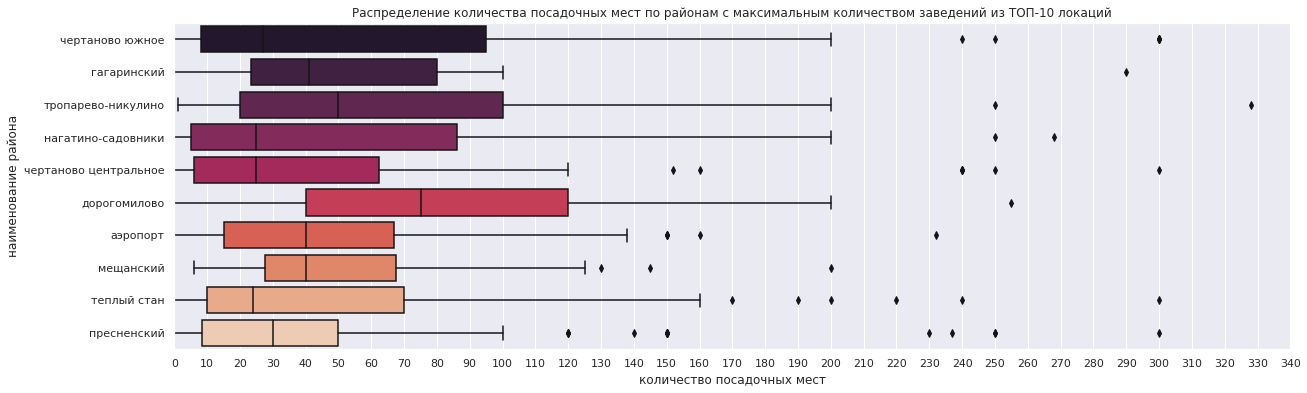

In [132]:
# Распределение посадочных мест по топ районам топ локаций
fig, ax = plt.subplots(figsize=(20,6))
sns.boxplot(y="city_district", x='number', data=seats.query('city_district in @district_top_loc'), orient='h', palette='rocket')
ax.set_xticks(np.arange(0,400,10))
plt.title('Распределение количества посадочных мест по районам с максимальным количеством заведений из ТОП-10 локаций')
ax.set_xlabel('количество посадочных мест')
ax.set_ylabel('наименование района')
ax.set_xlim(0, 340)
plt.show()

**Кутузовский проспект в районе Дорогомилово имеет самою большую медиану посадки, Кировоградскя улица в Чертаново-Центральное, Каширское шоссе в Нагатино-Садовники, Варшавское шоссе в Чертаново-Южное и Профсоюзная улица в Теплом стане - самые низкие медианные посадки. Наименьший разброс в посадке на Пресненской набережно и на проспекте Мира в Мещанском районе**

## Итоговый вывод

**Главная сложность в анализе представленных данных, бессистемная, варьиативная запись названий заведений, что не позволяет полноценно обработать дубли и сделать точные группировки по сетевым заведениям**

**ФОРМАТЫ:**

**70% рынка занимают форматы кафе (39.7%), столовая (17.8%), ресторан (14.9%)**

**СЕТЕВОЙ ПРИЗНАК:**

**Консолидация рынка общественного питания в Москве низкая, сетевое заведение лишь каждое пятое (19%), в формате сети более всех распространены кафе - почти половина сетевых заведений в этом формате (47%), на втором месте бистро (26.6%), на третьем - рестораны (18.3%). На долю остальных сетевых форматов приходиться менее 8%. Стоить отметить что под сетью может пониматься бренд и работа по франшизе.**

**ТИПИЧНАЯ СЕТЬ:**

**Половина сетевых заведений имеют от 12 до 72 посадочных мест, более 159 мест и более имеет только каждое двадцатое заведение. Хотя на рынке присутствуют заведения с несколькими сотнями посадочных мест, таких - менее процента. При среднем 52, медианная посадка - 40 мест. Если перевести в обычные столики, то в среднем в сетевом заведении чуть более десятка столов.
Вероятность встретить небольшую по числу точек сеть с небольшим количеством посадочных мест самая высокая.**

**РАСПРЕДЕЛЕНИЕ ПОСАДОЧНЫХ МЕСТ**

**Для рынка Москвы самый широкий разброс посадочных мест характерен для формата столовых, в среднем 130 мест, при медианной посадке 103 места. Широкий разброс также у буфетов и ресторанов - половина этих форматов имеет 14 - 80 мест и 45 - 105 мест соответственно, самый популярный формат кафе имеет в среднем 40 мест. Меньше всего размах посадки у закусочных, кафетериев и отделов кулинарии. У формата бистро много разнообразных по размеру заведений, среднее количество мест 21, при медианной посадке - 5 мест, при том каждое 20 бистро имеет более 60 мест.**

**ЛОКАЦИЯ:**

**В число улиц с самым большим количеством точек общепита входят в основном крупные магистрали столицы и Пресненская набережная рядом с деловым центром Москва-сити (167 заведений).**

In [133]:
location_top.style.background_gradient(cmap=cm)

,street,unit_qty
0,проспект Мира,204
1,Профсоюзная улица,183
2,Ленинградский проспект,173
3,Пресненская набережная,167
4,Варшавское шоссе,162
5,Ленинский проспект,148
6,проспект Вернадского,130
7,Кутузовский проспект,114
8,Каширское шоссе,112
9,Кировоградская улица,110


**Многие городские артерии и магистрали проходят по нескольким районам, где число заведений распределено неравномерно, так например самыми концентрированными районами являются Чертаново Центральное для Кировоградской улицы (79  из 110), Тропарево-Никулино для проспекта Врнадского (67 из 130), район Аэропорт для Ленинградского проспекта (65 из 148). Более равномерно распределение заведений по районам на Профсоюзной улице и Ленинском проспекте**

<br> **Самым концентрированным местом заведений общепита является Пресненская набережная с Москва-сити, как деловой центр. Расположение заведения в топ локациях оправдан для заведений ориентирующихся на большой трафик топ магистралей и их окрестностей, хотя конкуренция в таких районах высока. Количество улиц с единственным заведением высоко в центральных районах вокруг Кремля, это Таганский, Басманный, Тверской, Пресненский районы, Хамовники, в центре много исторической московской застройки и небольших улиц и переулков. Менее всего таких улиц на окраинах, где современная квартальная застройка и много ТЦ.**

**РАСПРЕДЕЛЕНИЕ ПОСАДОЧНЫХ МЕСТ В ТОП ЛОКАЦИЯХ:**

**Локации с высоким медианным числом посадочных мест - проспекты Мира, Вернадского, Ленинский, Кутузовский, наименьшую медианную посадку имеет Профсоюзная улица. Самые высокие медианные посадки и разброс посадочных мест имеют в топ локациях форматы столовых и ресторанов - 95 и 80 мест соответственно, самый популярный в Москве формат кафе - имеет медианную посадку 30 мест, половина таких заведений в топ локациях имеет от 12 до 52 мест. Распределение посадочных мест в топ локациях в целом не очень отличается от остальной Москвы.**

**СЕТЕВОЙ ФАКТОР В ТОП ЛОКАЦИЯХ:**

**Распределение мест между сетевыми и несетевыми заведениями в топ локациях различается слабо, чуть более высокая медианная посадка у сетей.**

**ОБЩАЯ РЕКОМЕНДАЦИЯ:**

<br>**Самыми главными факторам успеха для проекта общепита - концепция и локация. С точки зрения форматов самый популярный в Москве - формат кафе с количеством посадочных мест от 15 до 52, уникальность концепции кафе где обслуживают роботы подходит для крупных магистралей столицы из ТОП-10, где высок траффик и есть концентрация масс людей. Самая горячая локация - деловой центр города - Москва-сити где расположено много офисов крупных компаний (район Пресненской набережной). Высокую концентрацию заведений а значит трафика имеют Кировоградская улица в районе Чертаново Центральное, проспект Вернадского в районе Тропарево-Никулино, Ленинградский проспект в районе Аэропорт, проспект Мира в Мещанском районе и районе Свиблово. Перспективна также Профсоюзная улица и Кутузовский проспект на все своем протяжении в силу стабильно высокого количества заведений и трафика соответственно.**

<br>**Рынок Москвы слабо консолидирован, с сетевой долей не более 20%, поэтому имеются хорошие перспективы тиражирования концепции в случае успеха - есть куда расти. В идеале - присутствие флагманской точки в районе Москва-сити и точек во всех топ-локациях.**

Cсылка на презентацию:
https://drive.google.com/file/d/10R818ekNnz6eUjfBvhTPoASEgN0lnJhX/view?usp=sharing

Прямая ссылка: https://drive.google.com/uc?export=download&id=10R818ekNnz6eUjfBvhTPoASEgN0lnJhX